In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display
from six import StringIO
import pydotplus, graphviz
from sklearn import tree
import multiprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve

# Pre-processing

In [2]:
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 
feature_names = ['age', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'serum_creatinine', 'sex', 'smoking']
target_name = ['no', 'yes']

In [3]:
# check for nulls # variable information 
print(heart_failure_clinical_records.variables) 

                        name     role        type demographic  \
0                        age  Feature     Integer         Age   
1                    anaemia  Feature      Binary        None   
2   creatinine_phosphokinase  Feature     Integer        None   
3                   diabetes  Feature      Binary        None   
4          ejection_fraction  Feature     Integer        None   
5        high_blood_pressure  Feature      Binary        None   
6                  platelets  Feature  Continuous        None   
7           serum_creatinine  Feature  Continuous        None   
8               serum_sodium  Feature     Integer        None   
9                        sex  Feature      Binary         Sex   
10                   smoking  Feature      Binary        None   
11                      time  Feature     Integer        None   
12               death_event   Target      Binary        None   

                                          description             units  \
0             

In [4]:
df = pd.DataFrame(X)
df['death'] = y
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<Axes: >

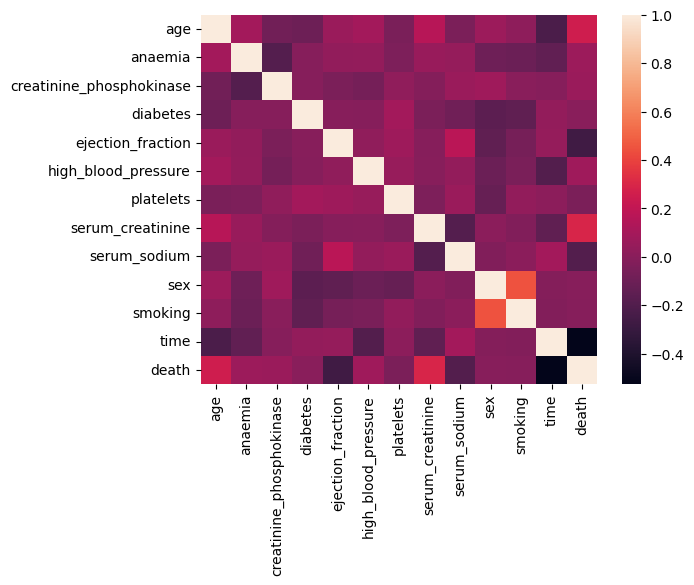

In [5]:
# correlation between variables
sns.heatmap(df.corr())

In [6]:
y = df['death']
X = df.drop(['anaemia', 'time', 'ejection_fraction', 'serum_sodium', 'platelets', 'death'], axis = 1)

In [7]:
X

,age,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,smoking
0,75.0,582,0,1,1.9,1,0
1,55.0,7861,0,0,1.1,1,0
2,65.0,146,0,0,1.3,1,1
3,50.0,111,0,0,1.9,1,0
4,65.0,160,1,0,2.7,0,0
...,...,...,...,...,...,...,...
294,62.0,61,1,1,1.1,1,1
295,55.0,1820,0,0,1.2,0,0
296,45.0,2060,1,0,0.8,0,0
297,45.0,2413,0,0,1.4,1,1


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

# Decision Tree

In [47]:
dt = DecisionTreeClassifier(max_depth=3,random_state=43)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=43)

In [48]:
clf_dt = GridSearchCV(dt, {'max_depth': [5, 10, 12],
                           'criterion': ['gini', 'entropy', 'log_loss'], 
                           'max_features': ['sqrt','log2'], 
                           'min_samples_leaf': [2, 3, 5]},
                       verbose=1, 
                       n_jobs=2, 
                       scoring='accuracy',
                       cv=5)
clf_dt.fit(X_train, y_train)
print(clf_dt.best_score_)
print(clf_dt.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
0.7115248226950355
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2}


In [49]:
dt = DecisionTreeClassifier(max_depth=10, 
                            max_features= 'sqrt', 
                            criterion = 'gini', 
                            min_samples_leaf=3, 
                            random_state=43)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                       random_state=43)

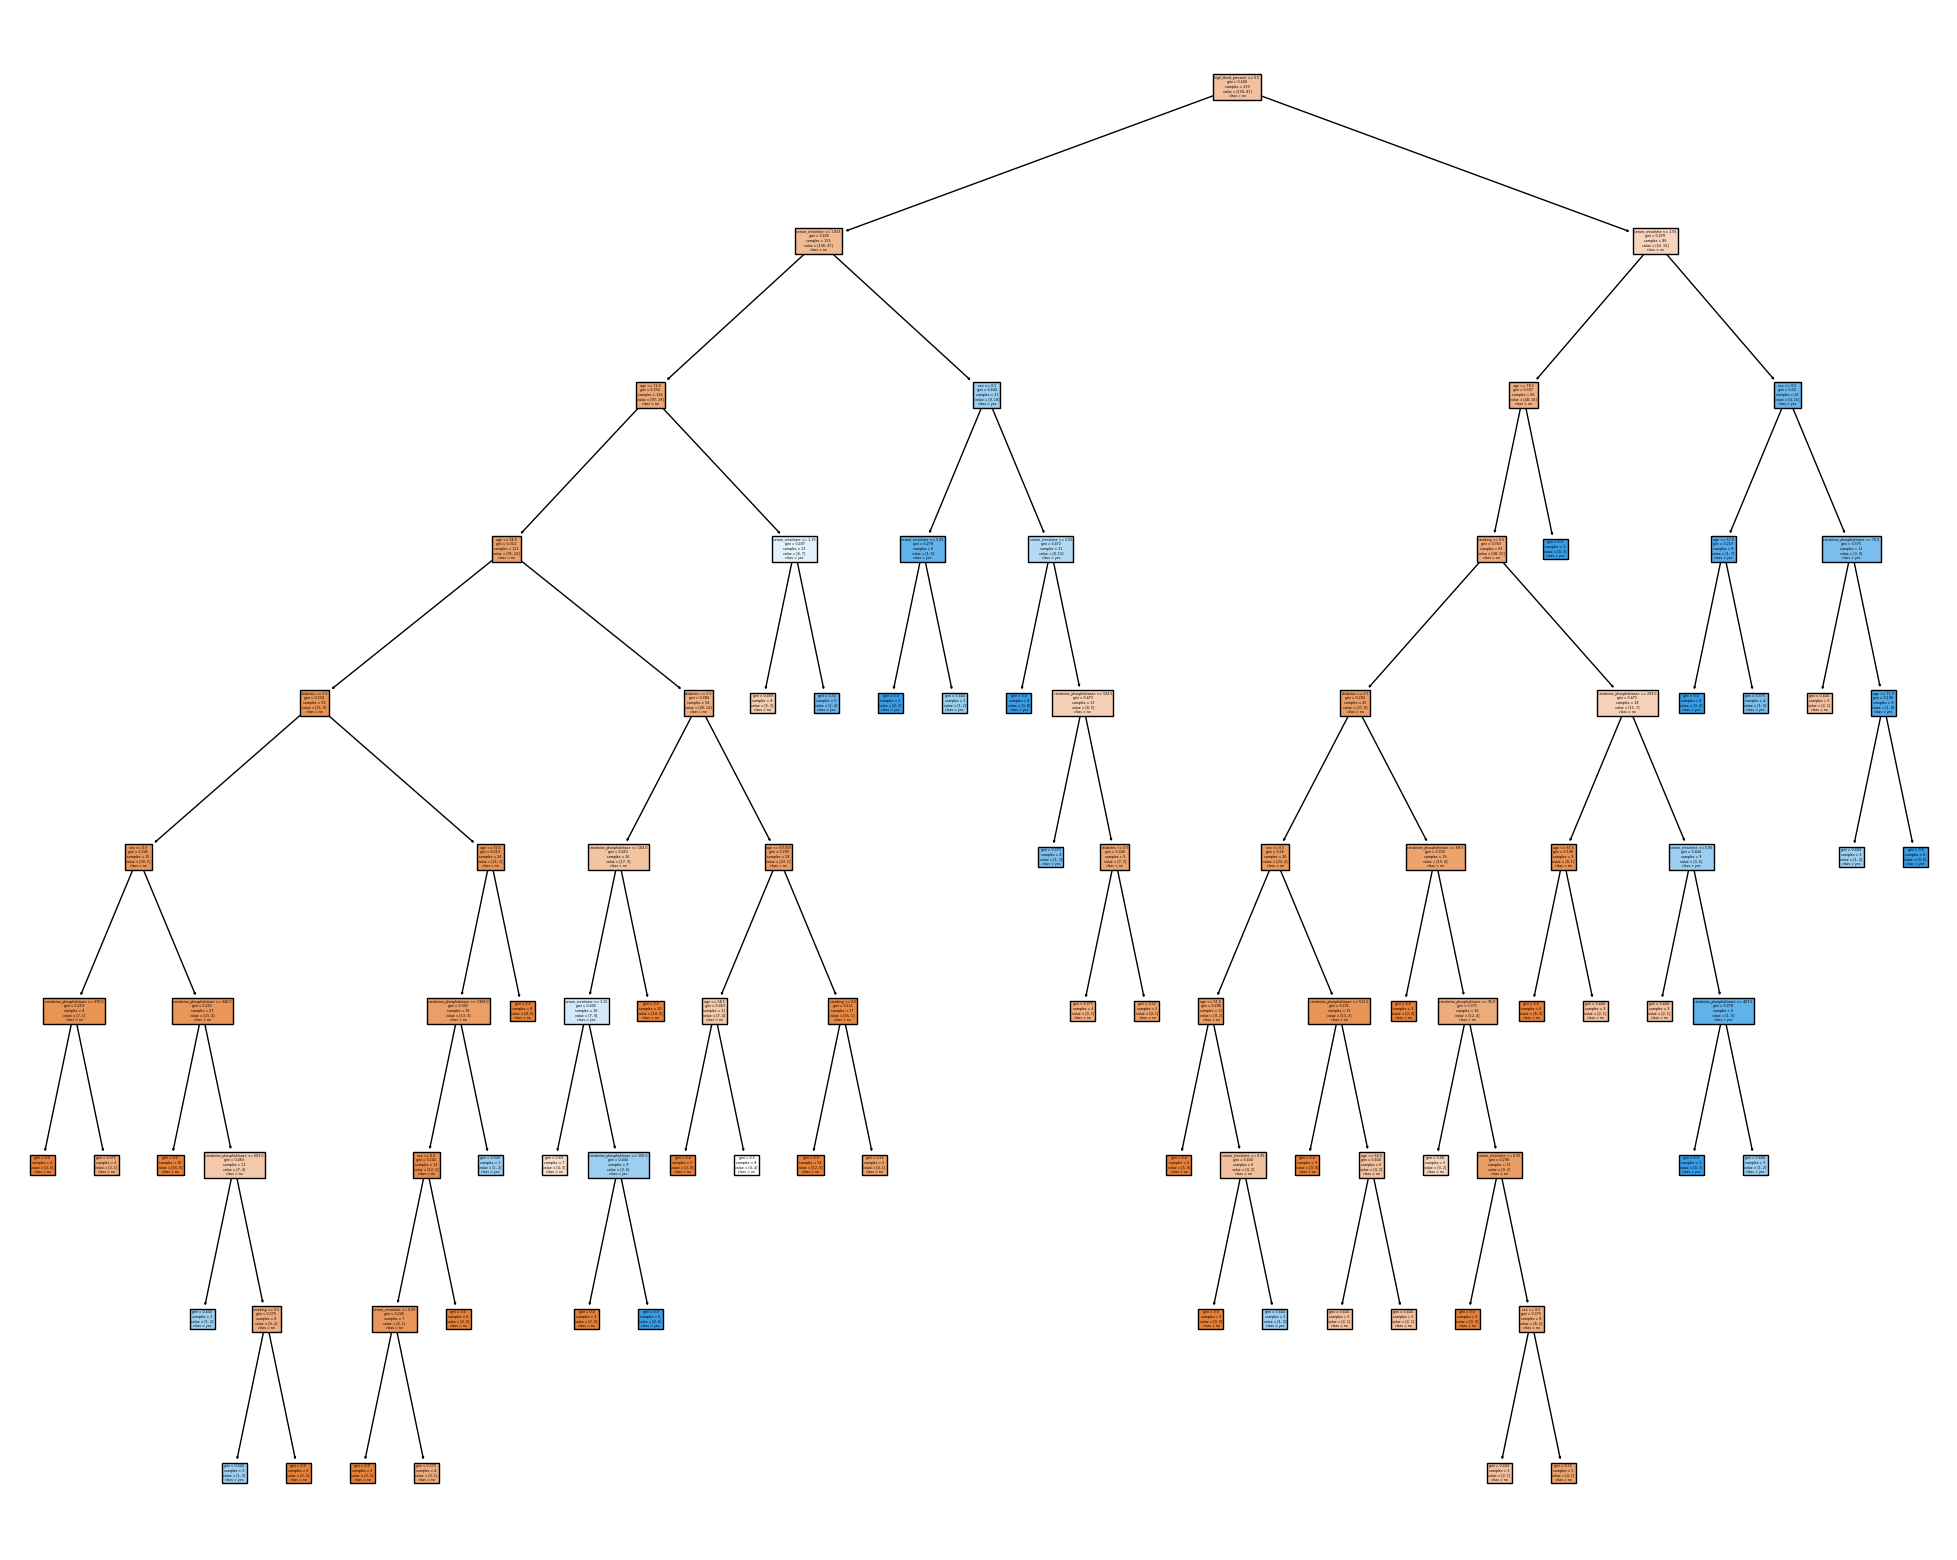

In [50]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_names,  
                   class_names=target_name,
                   filled=True)


In [51]:
predictions = dt.predict(X_test)
predicted_probas = dt.predict_proba(X_test)

In [52]:
print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        45
           1       0.57      0.53      0.55        15

    accuracy                           0.78        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.78      0.78      0.78        60

Predicted labels:  [0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0]
Accuracy:  0.7833333333333333


C:\Users\max\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


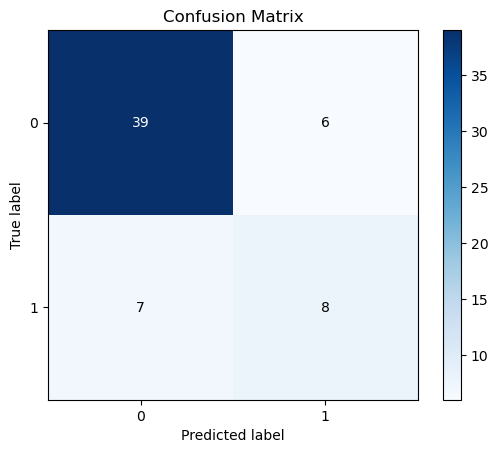

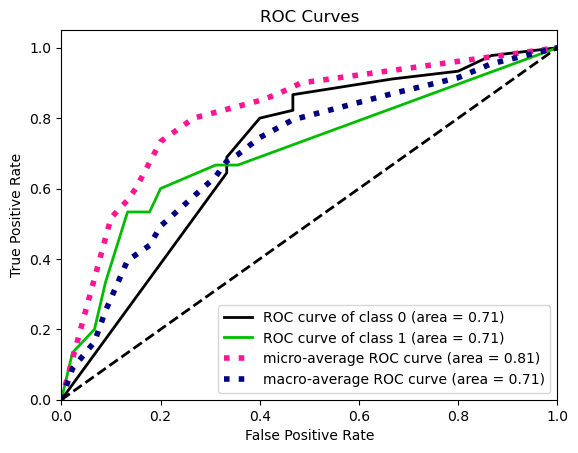

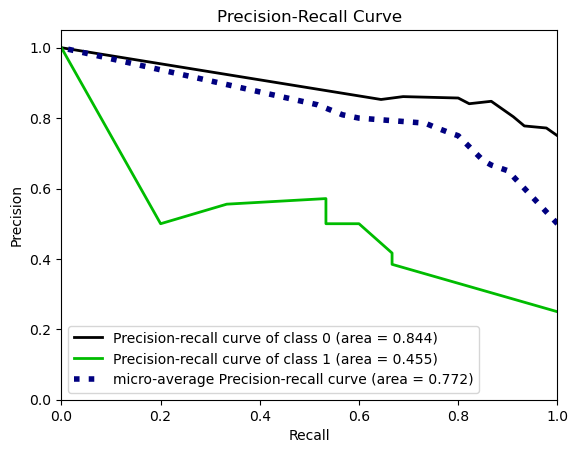

In [53]:
skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

# Random Forest

In [54]:
rf = RandomForestClassifier(n_estimators=30, random_state = 43, max_depth = 3)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=30, random_state=43)

In [55]:
clf_rf = GridSearchCV(rf, {'max_depth': [5, 10, 12], 
                           'n_estimators': [100, 200, 300], 
                           'max_features': ['sqrt', 'log2']},
                       verbose=1, 
                       n_jobs=2, 
                       scoring='accuracy',
                       cv=5)
clf_rf.fit(X, y)
print(clf_rf.best_score_)
print(clf_rf.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.7423163841807909
{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}


In [56]:
rf = RandomForestClassifier(n_estimators=300, max_depth = 5, max_features = 'sqrt', random_state = 43)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=43)

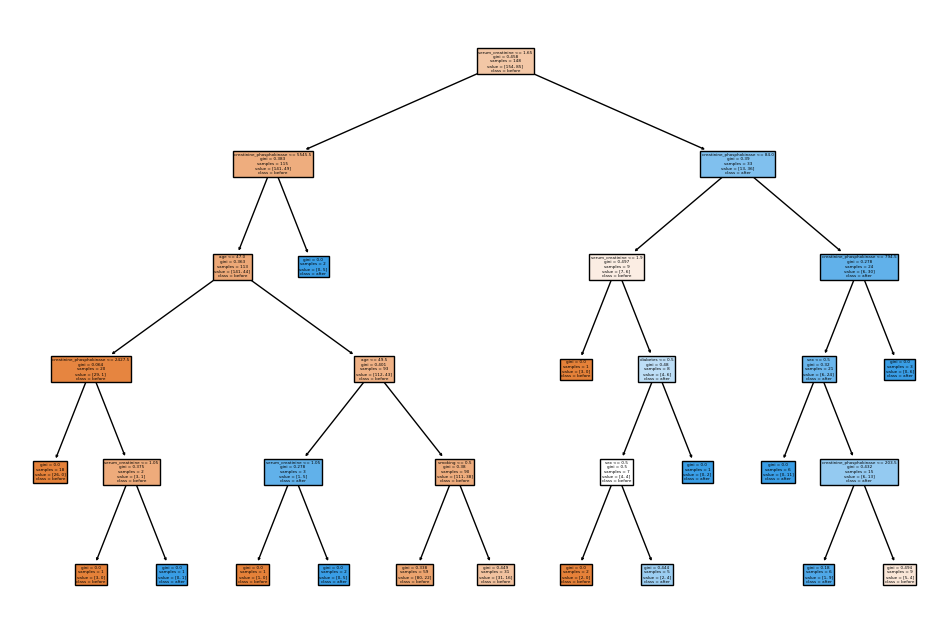

In [57]:
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[1], filled=True, feature_names=X.columns, class_names=['before', 'after'])
plt.show()

In [58]:
predictions = rf.predict(X_test)
predicted_probas = rf.predict_proba(X_test)

In [59]:
y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        45
           1       0.86      0.40      0.55        15

    accuracy                           0.83        60
   macro avg       0.84      0.69      0.72        60
weighted avg       0.84      0.83      0.81        60

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
Accuracy:  0.8333333333333334


C:\Users\max\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


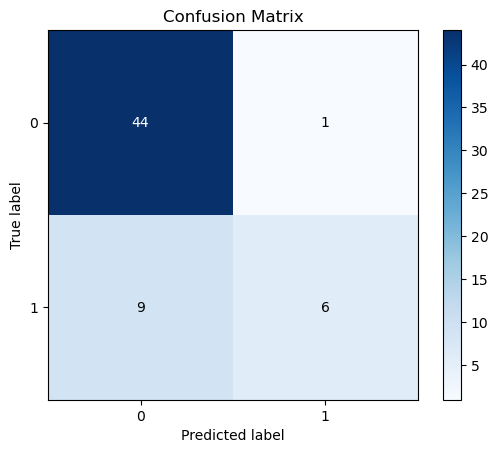

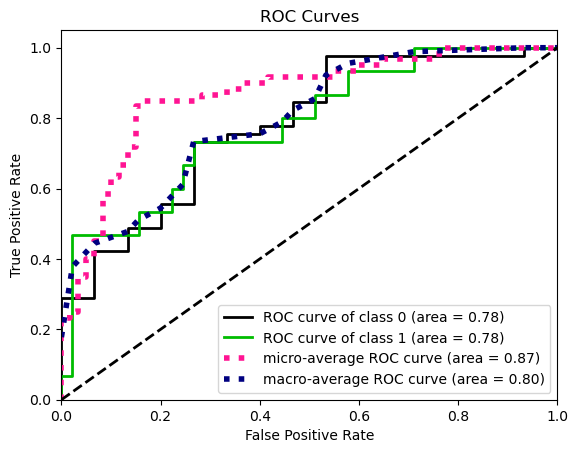

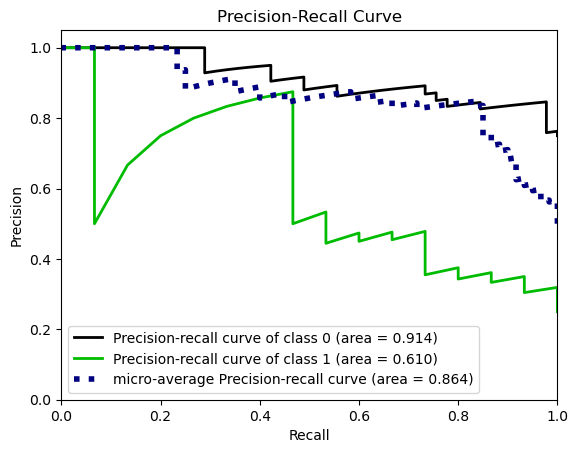

In [60]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_probs)
skplt.metrics.plot_precision_recall_curve(y_test, y_probs)
plt.show()

# Adaboost

In [61]:
base_classifier = RandomForestClassifier()
adac = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate = 1, random_state=42)
adac.fit(X_train, y_train)

clf1 = GridSearchCV(adac, {'learning_rate': [1, 25, 50, 75, 100],
                           'n_estimators': [10, 50, 100, 200, 300]},
                   verbose=1, 
                   n_jobs=2)
clf1.fit(X_train, y_train)
print(clf1.best_score_)
print(clf1.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0.7282801418439717
{'learning_rate': 1, 'n_estimators': 10}


In [62]:
adac = AdaBoostClassifier(base_classifier, n_estimators=10, learning_rate = 1, random_state=42)
adac.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(), learning_rate=1,
                   n_estimators=10, random_state=42)

In [63]:
y_pred = adac.predict(X_test)
y_probs = adac.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.8166666666666667
Confusion Matrix:
 [[41  4]
 [ 7  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        45
           1       0.67      0.53      0.59        15

    accuracy                           0.82        60
   macro avg       0.76      0.72      0.74        60
weighted avg       0.81      0.82      0.81        60



C:\Users\max\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


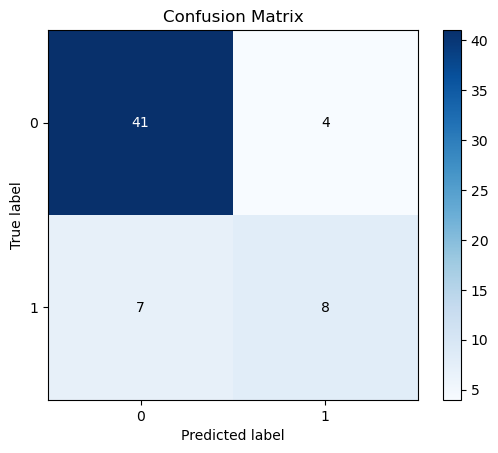

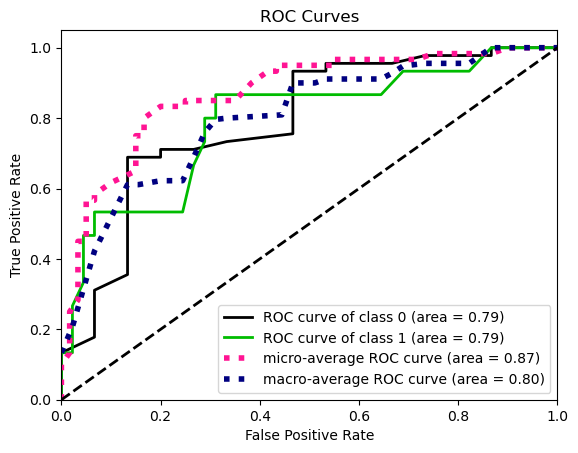

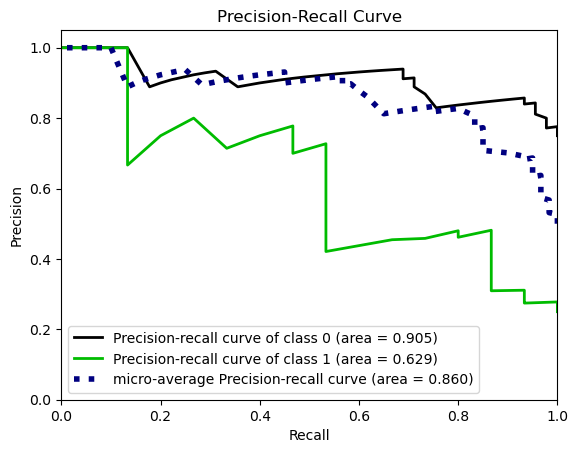

In [64]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_probs)
skplt.metrics.plot_precision_recall_curve(y_test, y_probs)
plt.show()

# XGBoost

In [65]:
xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)
clf_xgb = GridSearchCV(xgb_model, {'max_depth': [5, 10, 12], 
                                   'n_estimators': [100, 200, 300]},                   verbose=1, 
                       n_jobs=2, 
                       scoring='accuracy',
                       cv=5)
clf_xgb.fit(X_train, y_train)
print(clf_xgb.best_score_)
print(clf_xgb.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.7072695035460993
{'max_depth': 5, 'n_estimators': 100}


In [66]:
xgbm = xgb.XGBClassifier(max_depth= 12, n_estimators= 100)
xgbm.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
y_pred = xgbm.predict(X_test)
y_probs = xgbm.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.75
Confusion Matrix:
 [[41  4]
 [ 7  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        45
           1       0.50      0.60      0.55        15

    accuracy                           0.75        60
   macro avg       0.68      0.70      0.69        60
weighted avg       0.77      0.75      0.76        60



C:\Users\max\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


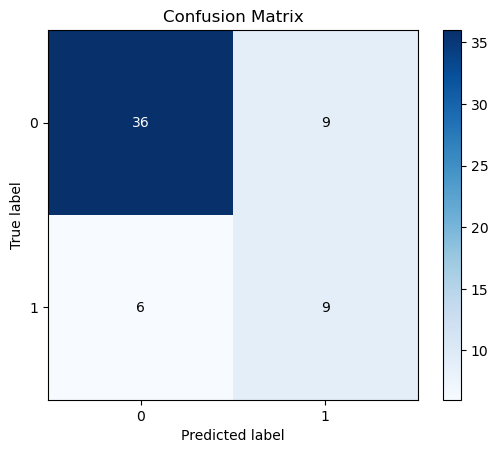

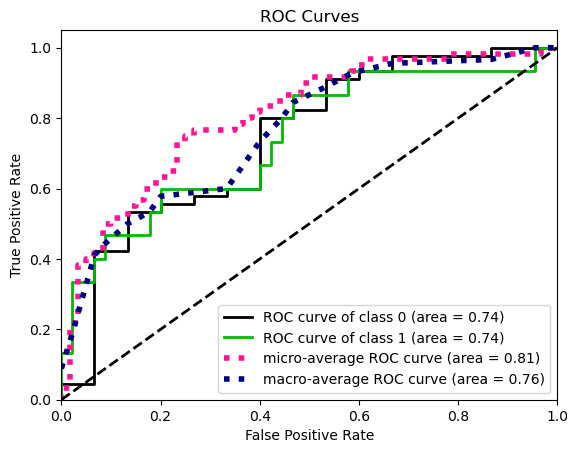

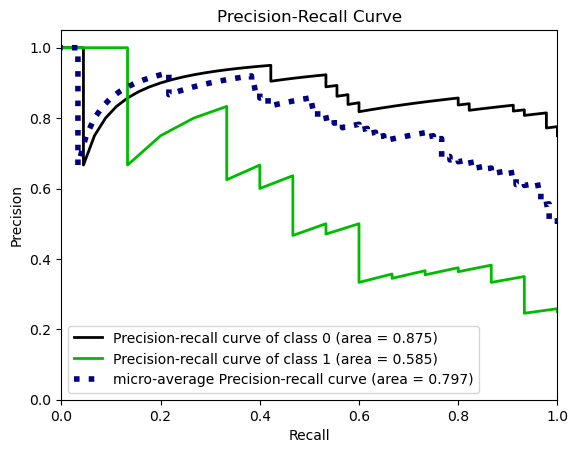

In [68]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_probs)
skplt.metrics.plot_precision_recall_curve(y_test, y_probs)
plt.show()

<Axes: >

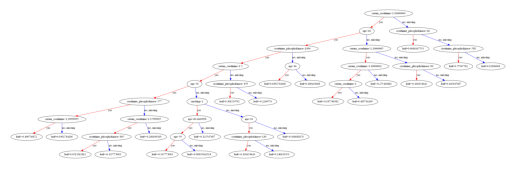

In [69]:
xgb.plot_tree(xgbm)

In [70]:
accuracy_scores = [0.667, 0.778, 0.867, 0.7]
methods = ['SDT', 'RFC', 'ADB', 'XGB']

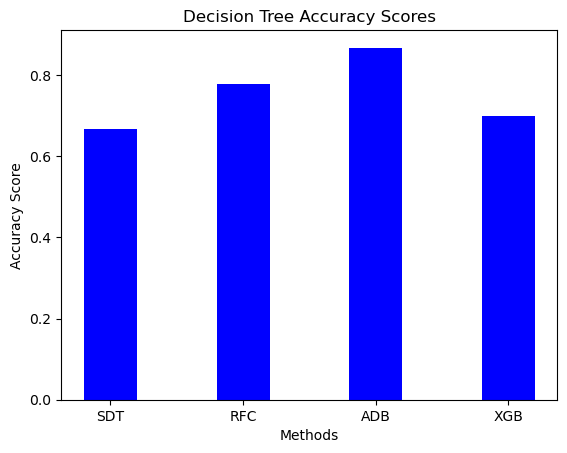

In [71]:
plt.bar(methods, accuracy_scores, color = 'blue', width = 0.4)
plt.xlabel("Methods")
plt.ylabel('Accuracy Score')
plt.title("Decision Tree Accuracy Scores")
plt.show()